In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.ensemble import RandomForestRegressor

In [3]:
from sklearn import metrics

In [5]:
df = pd.read_csv("gld_price_data.csv")
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [12]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [14]:
df.shape

(2290, 6)

In [7]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
df.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

In [15]:
#we can use the .info() to get the the dtypes and if there are nullable or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [16]:
#let's see if their is a positive or negative correlation beween the columns of the dataset 
#we can say that a positive correlation => is directly proportional
#we can say that a negative correlation => is indirectly proportional
#to see this correlation we construct a heatmap 

In [22]:
corrl = df.corr()

<AxesSubplot:>

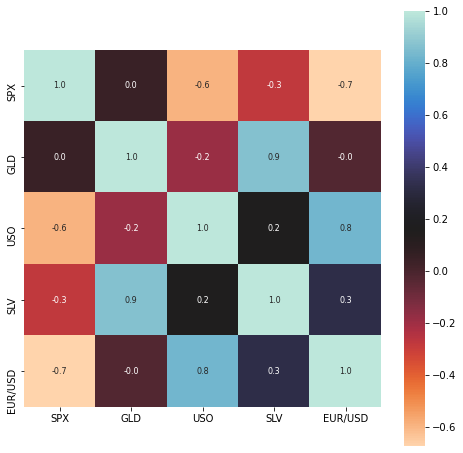

In [27]:
plt.figure(figsize=(8,8))
sns.heatmap(corrl, cbar =True, square =True, fmt='.1f', annot=True, annot_kws ={'size' : 8}, cmap="icefire_r")

In [28]:
#we can conclude from this heatmap above thte GLD column is positevely corelated to the SLV column with +0.9
# also USO with EUR/USD at +0.8 , 
# spx and eur/usd has a negative correlation with -0.7
# and uso and spx have also a negative correlation at -0.6 

In [29]:
print(corrl['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\JJK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

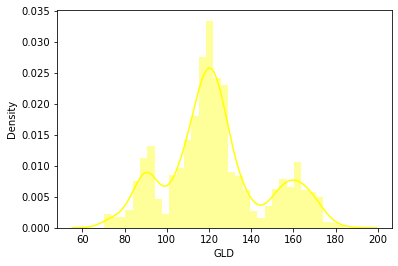

In [41]:
#let's see the distribution of the GLD 
sns.distplot(df['GLD'], color = 'yellow')

In [44]:
#splitting the data
X = df.drop(['Date', 'GLD'], axis =1)
Y = df['GLD']


In [45]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [46]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [54]:
#Split and Test 
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size =0.2, random_state =2)

In [55]:
reg = RandomForestRegressor(n_estimators =100)

In [56]:
reg.fit(x_train,y_train)

RandomForestRegressor()

In [57]:
test_pred = reg.predict(x_test)

In [58]:
print(test_pred)

[168.74719958  81.75819988 116.4815001  127.61000081 120.69260142
 154.71039859 150.29839795 125.99590031 117.48949873 126.10570039
 116.47900106 171.87250076 141.649099   167.95529825 115.16160012
 117.83050048 138.04650332 170.43970129 159.56420383 160.59889942
 155.15719978 125.3480002  176.22949933 157.43720354 125.15100059
  93.80629952  77.22440029 120.30109986 119.16069936 167.52510023
  88.06149961 125.12469964  91.05550074 117.73460032 121.21109929
 136.70660178 115.60040108 115.21450097 147.27459973 107.26980117
 104.40250265  87.24479772 126.51980073 118.08340005 154.05139908
 119.64570003 108.30989989 108.03379822  93.30820069 126.9388981
  74.76440051 113.73669933 121.26590025 111.29399912 118.93039894
 120.7089995  159.34829979 167.68610151 146.897397    85.88559875
  94.31020039  86.76289893  90.84400036 119.14300081 126.37770089
 127.57709973 169.87299913 122.18889912 117.33959876  98.46790056
 168.22250156 142.8307984  132.30270246 121.14510256 121.63469943
 119.819000

In [60]:
#model Evaluation

#R squared error 
s1 = metrics.r2_score(y_test, test_pred)
print("R squared error",s1)

R squared error 0.9892525898247433


In [61]:
#let us compare the actual values vs the predicted values 

In [62]:
y_test = list(y_test)

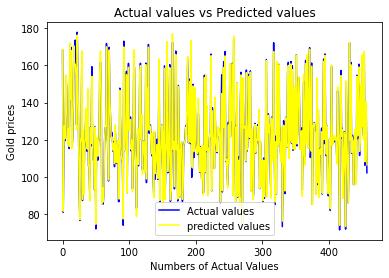

In [64]:
plt.plot(y_test, color = 'blue', label ='Actual values')
plt.plot(test_pred, color = 'yellow', label ='predicted values')
plt.title('Actual values vs Predicted values')
plt.xlabel('Numbers of Actual Values')
plt.ylabel('Gold prices')
plt.legend()
plt.show()

In [65]:

from sklearn.linear_model import LinearRegression

In [66]:
model = LinearRegression()

In [67]:
model.fit(x_train,y_train)

LinearRegression()

In [69]:
y_pred = model.predict(x_test)

In [70]:
#R squared error 
sl = metrics.r2_score(y_test, y_pred)
print("R squared error",sl)

R squared error 0.8657886565869237


In [71]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

lr = MAPE(y_test,y_pred)
rfr=  MAPE(y_test,test_pred)
print("Linear Regression: ", lr, "%")
print("Random Forrest Regressor: ", rfr, "%")

Linear Regression:  4.673785467677883 %
Random Forrest Regressor:  1.0651195123697608 %


In [72]:
# After testing out the Mean Absolute Percantage error of both models Linear Regression , Random Forest Regression
# we got really good results for testing errors in both models especially in Random Forrest Regressor 
#where we got really good results

In [73]:
from xgboost import XGBRegressor

In [74]:
m = XGBRegressor()

In [75]:
m.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [76]:
pred = m.predict(x_test)

In [77]:
sx = metrics.r2_score(y_test,pred)
print("R squared error: ",sx)

R squared error:  0.9873849231050468


In [79]:
fx = MAPE(y_test,pred)
print("Mean Absolute Percantage Error: ", fx, "%")

Mean Absolute Percantage Error:  1.1878165443556759 %


In [80]:
# after trying a boosting ensemble technique the MAPE is 1.187% these are great results
# but the bagging ensemble technique which is a random forest regressor algortithm performed better with a MAPE 1.065%